In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

sys.path.append("../../modules/")
import geostat as geo

In [2]:
data = "../../data/T&K/T_plio.csv"
d = pd.read_csv(data,sep=";")
x = d.iloc[:,[0,1]].values
v = d.iloc[:,2]
v = np.log10(v)

In [3]:
mat = np.zeros([x.shape[0],x.shape[0]])
for i1,p in enumerate(x):
    i1 = int(i1)
    for i2,p2 in enumerate(x):
        i2 = int(i2)
        mat[i1,i2] = ((p[0]-p2[0])**2 + (p[1]-p2[1])**2)**0.5

0.2036557672449728
3760


(array([  11.,   26.,  143.,  438., 1231., 1293.,  438.,  143.,   26.,
          11.]),
 array([-2.72563686, -2.18050949, -1.63538212, -1.09025474, -0.54512737,
         0.        ,  0.54512737,  1.09025474,  1.63538212,  2.18050949,
         2.72563686]),
 <a list of 10 Patch objects>)

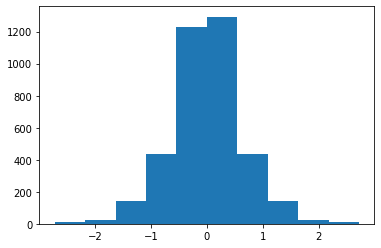

In [4]:
ip1,ip2 = np.where((mat < 10000)&(mat>9000))
val=(v[ip1].values - v[ip2].values)
print(0.5*np.var(val))
print(val.shape[0])
plt.hist(val)

In [5]:
def vario_gauss(h,a,palier):
    var = palier*(1-np.e**(-3*(h/a)**2))
    return var

In [6]:
def vario_exp(h,a,palier):
    var = palier*(1-np.e**((-h/a)))
    return var

Text(0.5, 1.0, 'vario plio')

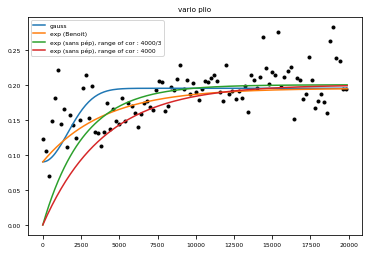

In [11]:
dh = 200
dist = 20000
for h in range(0,dist,dh):
    ip1,ip2 = np.where((mat < h+dh)&(mat>h))
    val=(v[ip1].values - v[ip2].values)
    plt.plot(h,0.5*np.var(val),".",color="k")
plt.plot(np.arange(0,dist,1e2),0.09+vario_gauss(np.arange(0,dist,1e2),4000,0.105),label="gauss")
plt.plot(np.arange(0,dist,1e2),0.09+vario_exp(np.arange(0,dist,1e2),4000,0.105),label="exp (Benoit)")
plt.plot(np.arange(0,dist,1e2),vario_exp(np.arange(0,dist,1e2),4000/1.5,0.20),label="exp (sans pép), range of cor : 4000/3")
plt.plot(np.arange(0,dist,1e2),vario_exp(np.arange(0,dist,1e2),4000,0.20),label="exp (sans pép), range of cor : 4000")
plt.legend()
plt.title("vario plio")

In [9]:
data = "../../data/T&K/T_Q.csv"
d = pd.read_csv(data,sep=";")
x = d.iloc[:,[0,1]].values
v = d.iloc[:,2]
v = np.log10(v)

In [10]:
# matric of distance
mat = np.zeros([x.shape[0],x.shape[0]])
for i1,p in enumerate(x):
    i1 = int(i1)
    for i2,p2 in enumerate(x):
        i2 = int(i2)
        mat[i1,i2] = ((p[0]-p2[0])**2 + (p[1]-p2[1])**2)**0.5

flopy is installed in C:\Users\emmal\Anaconda3\lib\site-packages\flopy


C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\utils\geostats.py:244: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


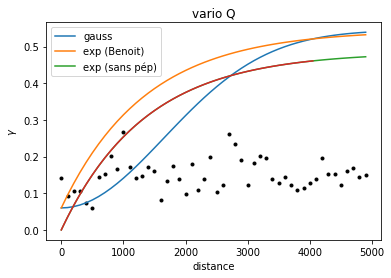

In [9]:
dh = 100
dist = 5000
for h in range(0,dist,dh):
    ip1,ip2 = np.where((mat < h+dh)&(mat>h))
    val=(v[ip1].values - v[ip2].values)
    plt.plot(h,0.5*np.var(val),".",color="k")
plt.plot(np.arange(0,dist,1e2),0.06+vario_gauss(np.arange(0,dist,1e2),1350,0.485),label="gauss")
plt.plot(np.arange(0,dist,1e2),0.06+vario_exp(np.arange(0,dist,1e2),1350,0.485),label="exp (Benoit)")
plt.plot(np.arange(0,dist,1e2),vario_exp(np.arange(0,dist,1e2),1350,0.485),label="exp (sans pép)")
plt.legend(loc="upper left")
plt.title("vario Q")

import pyemu
vq2 = pyemu.geostats.ExpVario(a=1350,contribution=0.485)
vq1 = pyemu.geostats.GauVario(a=1350,contribution=0.485)
grid_q1 = pyemu.geostats.GeoStruct(variograms=vq1, transform='log')
grid_q2 = pyemu.geostats.GeoStruct(variograms=vq2, transform='log')
#grid_q1.plot()
grid_q2.plot()